In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Training set image preprocessing
training_set = tf.keras.utils.image_dataset_from_directory(
    "train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

# Validation set image preprocessing
validation_set = tf.keras.utils.image_dataset_from_directory(
    "valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

# Building model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

model = Sequential()

# Update the input_shape to match the new image size
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[64, 64, 3]))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Dropout(0.25))  # Reduce the depth by removing the last Conv2D and MaxPool2D layers
model.add(Flatten())
model.add(Dense(units=1500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=38, activation='softmax'))  # Output layer

# Compiling model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Model training
training_history = model.fit(
    x=training_set,
    validation_data=validation_set,
    epochs=10
)


Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 31, 31, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     1,537,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,766,794 (10.55 MB)

 Trainable params: 2,766,794 (10.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1127s 507ms/step - accuracy: 0.3687 - loss: 2.2856 - val_accuracy: 0.8129 - val_loss: 0.6155
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1176s 535ms/step - accuracy: 0.7803 - loss: 0.6978 - val_accuracy: 0.8692 - val_loss: 0.4167
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1198s 545ms/step - accuracy: 0.8607 - loss: 0.4354 - val_accuracy: 0.8960 - val_loss: 0.3204
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1115s 507ms/step - accuracy: 0.8956 - loss: 0.3181 - val_accuracy: 0.9210 - val_loss: 0.2457
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1261s 574ms/step - accuracy: 0.9213 - loss: 0.2435 - val_accuracy: 0.9353 - val_loss: 0.2038
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1468s 658ms/step - accuracy: 0.9337 - loss: 0.1969 - val_accuracy: 0.9431 - val_loss: 0.1733
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1539s 700ms/step - accuracy: 0.9503 - loss: 0.1488 - val_accuracy: 0.9490 - val_loss: 0.1541
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1545s 703ms/s

In [3]:
import tensorflow as tf
training_set = tf.keras.utils.image_dataset_from_directory(
    "train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)


Found 70295 files belonging to 38 classes.


In [5]:
from tensorflow.keras.models import load_model

model = load_model("training_model.keras")
train_loss, train_acc = model.evaluate(training_set)


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 22 variables whereas the saved optimizer has 42 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 328s 149ms/step - accuracy: 0.9875 - loss: 0.0388


In [19]:
print(train_loss, train_acc)

0.038707103580236435 0.9877516031265259


In [9]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    "valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

val_loss, val_acc = model.evaluate(validation_set)

Found 17572 files belonging to 38 classes.
550/550 ━━━━━━━━━━━━━━━━━━━━ 67s 121ms/step - accuracy: 0.9548 - loss: 0.1484


In [21]:
print(val_loss, val_acc)

0.14651967585086823 0.9552697539329529


In [15]:
#SAVING MODEL
model.save("training_model.keras")

In [23]:
training_history.history

NameError: name 'training_history' is not defined

In [5]:
#Recording History in JSON
import json

with open("training_hist.json", "w") as f:
    json.dump(training_history.history, f)

NameError: name 'training_history' is not defined

In [11]:
#ACCURACY VISUALIZATION
import matplotlib.pyplot as plt

epochs = [i for i in range(1,11)]
plt.plot(epochs, training_history.history["accuracy"], color="red", label="Training Accuracy")
plt.plot(epochs, training_history.history["val_accuracy"], color="blue", label="Training Accuracy")
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.legend()
plt.show()

NameError: name 'training_history' is not defined

In [47]:
#OTHER METRICS FOR MODEL EVALUATION
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [27]:
test_set = tf.keras.utils.image_dataset_from_directory(
    "valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)


Found 17572 files belonging to 38 classes.


In [29]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape


550/550 ━━━━━━━━━━━━━━━━━━━━ 73s 131ms/step


(array([[9.9951231e-01, 1.1290741e-05, 4.2274806e-09, ..., 4.8649366e-13,
         1.8513709e-13, 2.2928413e-09],
        [9.8409396e-01, 1.3953524e-04, 2.9093613e-07, ..., 2.1232123e-09,
         3.1878782e-09, 2.4132444e-06],
        [9.9999964e-01, 2.3013171e-09, 2.0447697e-09, ..., 4.5939028e-16,
         2.0101847e-15, 8.1455134e-11],
        ...,
        [4.2692819e-10, 2.8862648e-16, 1.5778234e-10, ..., 6.4043403e-15,
         1.0738317e-13, 9.9999654e-01],
        [3.7151218e-09, 1.8060113e-13, 2.1897650e-08, ..., 4.3421909e-13,
         2.6982438e-12, 9.9999988e-01],
        [8.7024982e-10, 1.0562574e-12, 4.5096309e-11, ..., 1.7490973e-12,
         7.6602336e-11, 9.9999332e-01]], dtype=float32),
 (17572, 38))

In [43]:
predicted_cat = tf.argmax(y_pred, axis=1)
predicted_cat

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [33]:
true_cat = tf.concat([y for x, y in test_set], axis=0)
true_cat

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [39]:
y_true = tf.argmax(true_cat, axis=1)
y_true 

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [49]:
#CALCULATING PRECISION, RECALL AND F1SCORE
from sklearn.metrics import classification_report

print(classification_report(y_true, predicted_cat, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.92      0.95      0.93       504
                                 Apple___Black_rot       0.96      0.99      0.97       497
                          Apple___Cedar_apple_rust       0.97      0.97      0.97       440
                                   Apple___healthy       0.95      0.95      0.95       502
                               Blueberry___healthy       0.97      0.96      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.90      0.93       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.97      0.

In [51]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, predicted_cat)
cm

array([[477,   6,   0, ...,   0,   0,   0],
       [  3, 490,   0, ...,   0,   0,   0],
       [  3,   0, 425, ...,   0,   0,   0],
       ...,
       [  0,   0,   1, ..., 476,   0,   0],
       [  2,   0,   0, ...,   0, 423,   0],
       [  0,   0,   1, ...,   0,   0, 474]], dtype=int64)

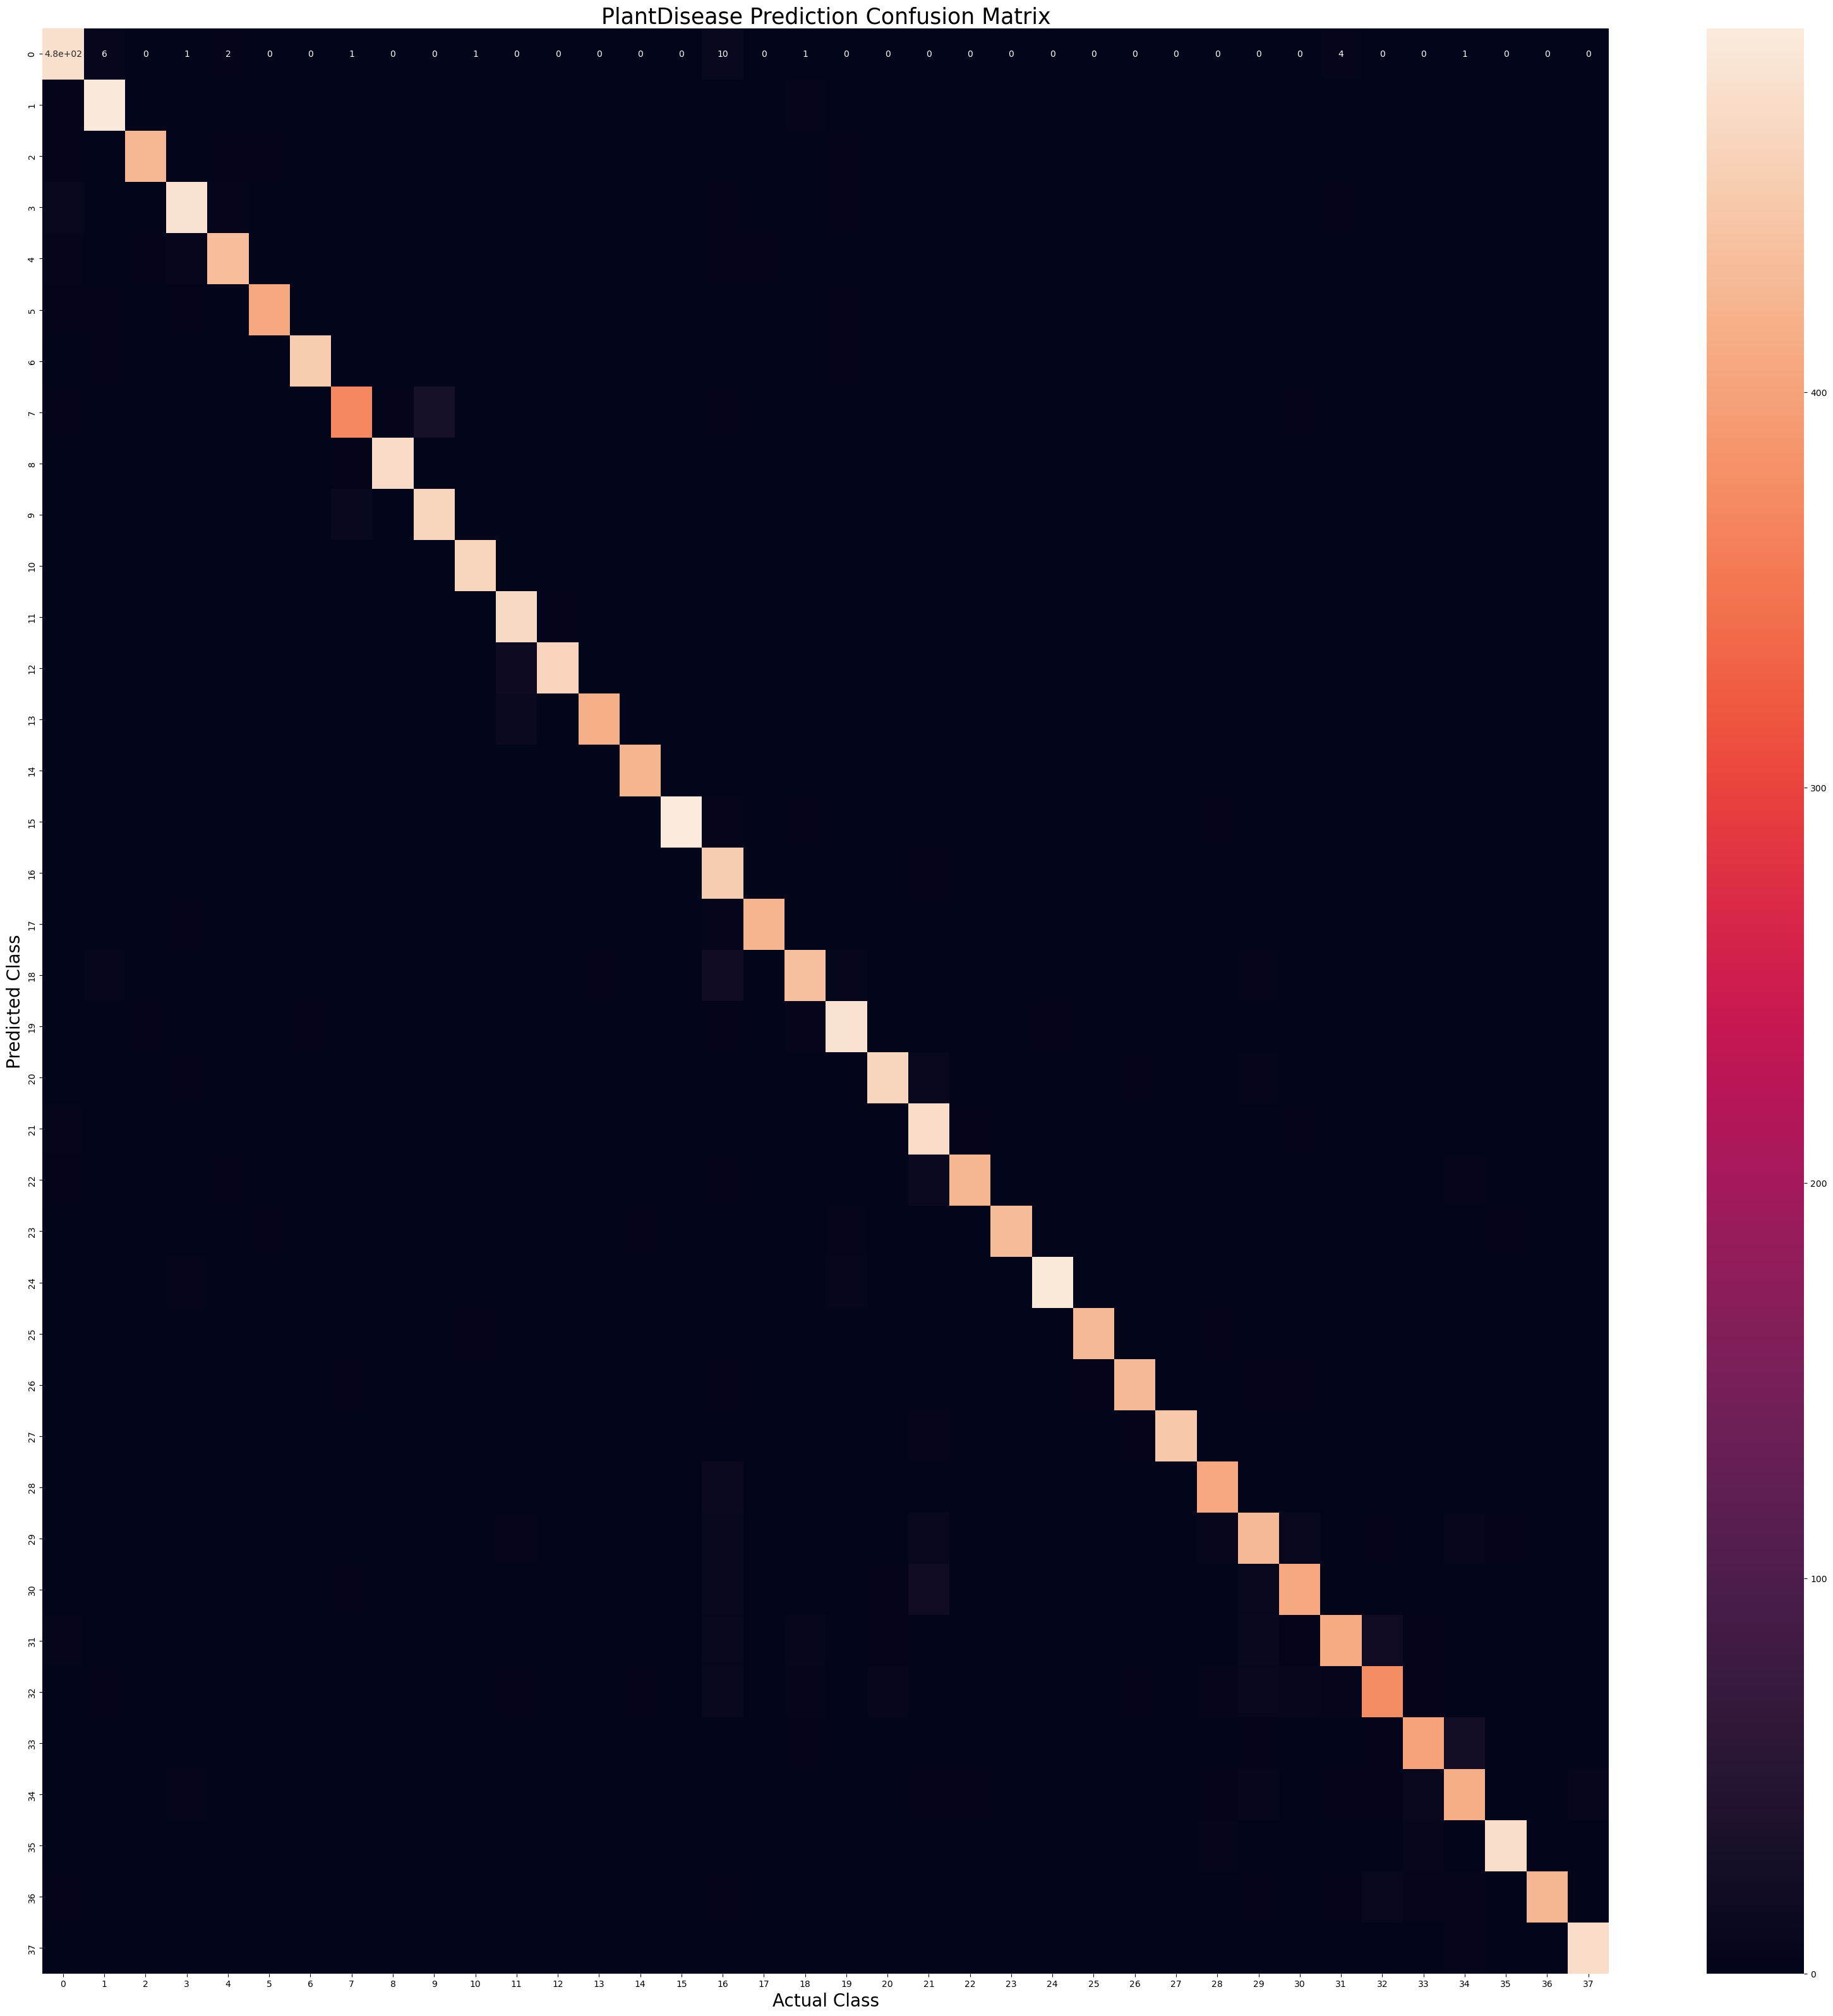

In [53]:
#CONFUSION MATRIX VISUALIZATION
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot=True, annot_kws={'size':10})
plt.xlabel("Actual Class", fontsize=20)
plt.ylabel("Predicted Class", fontsize=20)
plt.title("PlantDisease Prediction Confusion Matrix", fontsize=25)
plt.show()